In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import seaborn.objects as so

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_theme()

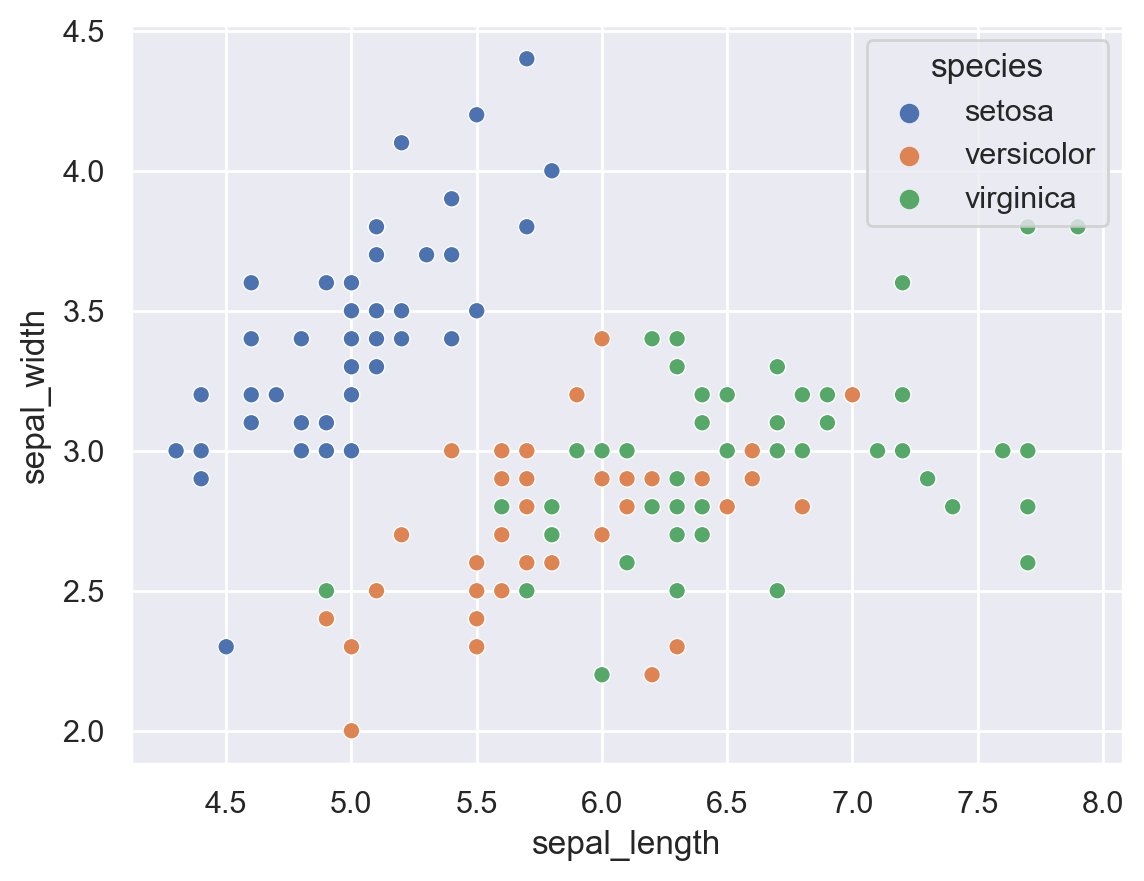

In [3]:
N = 100

iris = sns.load_dataset("iris")
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species");

In [4]:
def build_model(data: pd.DataFrame) -> pm.Model:
    x = data["sepal_length"].values
    x = (x - x.mean()) / x.std()
    with pm.Model() as model:
        a = pm.Normal("a", 0, 5)
        b = pm.Normal("b", 0, 2.5)
        mu = a + b * x
        sigma = pm.HalfNormal("sigma", 2.5)
        _ = pm.Normal("y", mu=mu, sigma=sigma, observed=data["sepal_width"])
    return model

NUTS

In [5]:
with build_model(iris):
    nuts_trace = pm.sample(chains=4, random_seed=123, discard_tuned_samples=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a, b, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


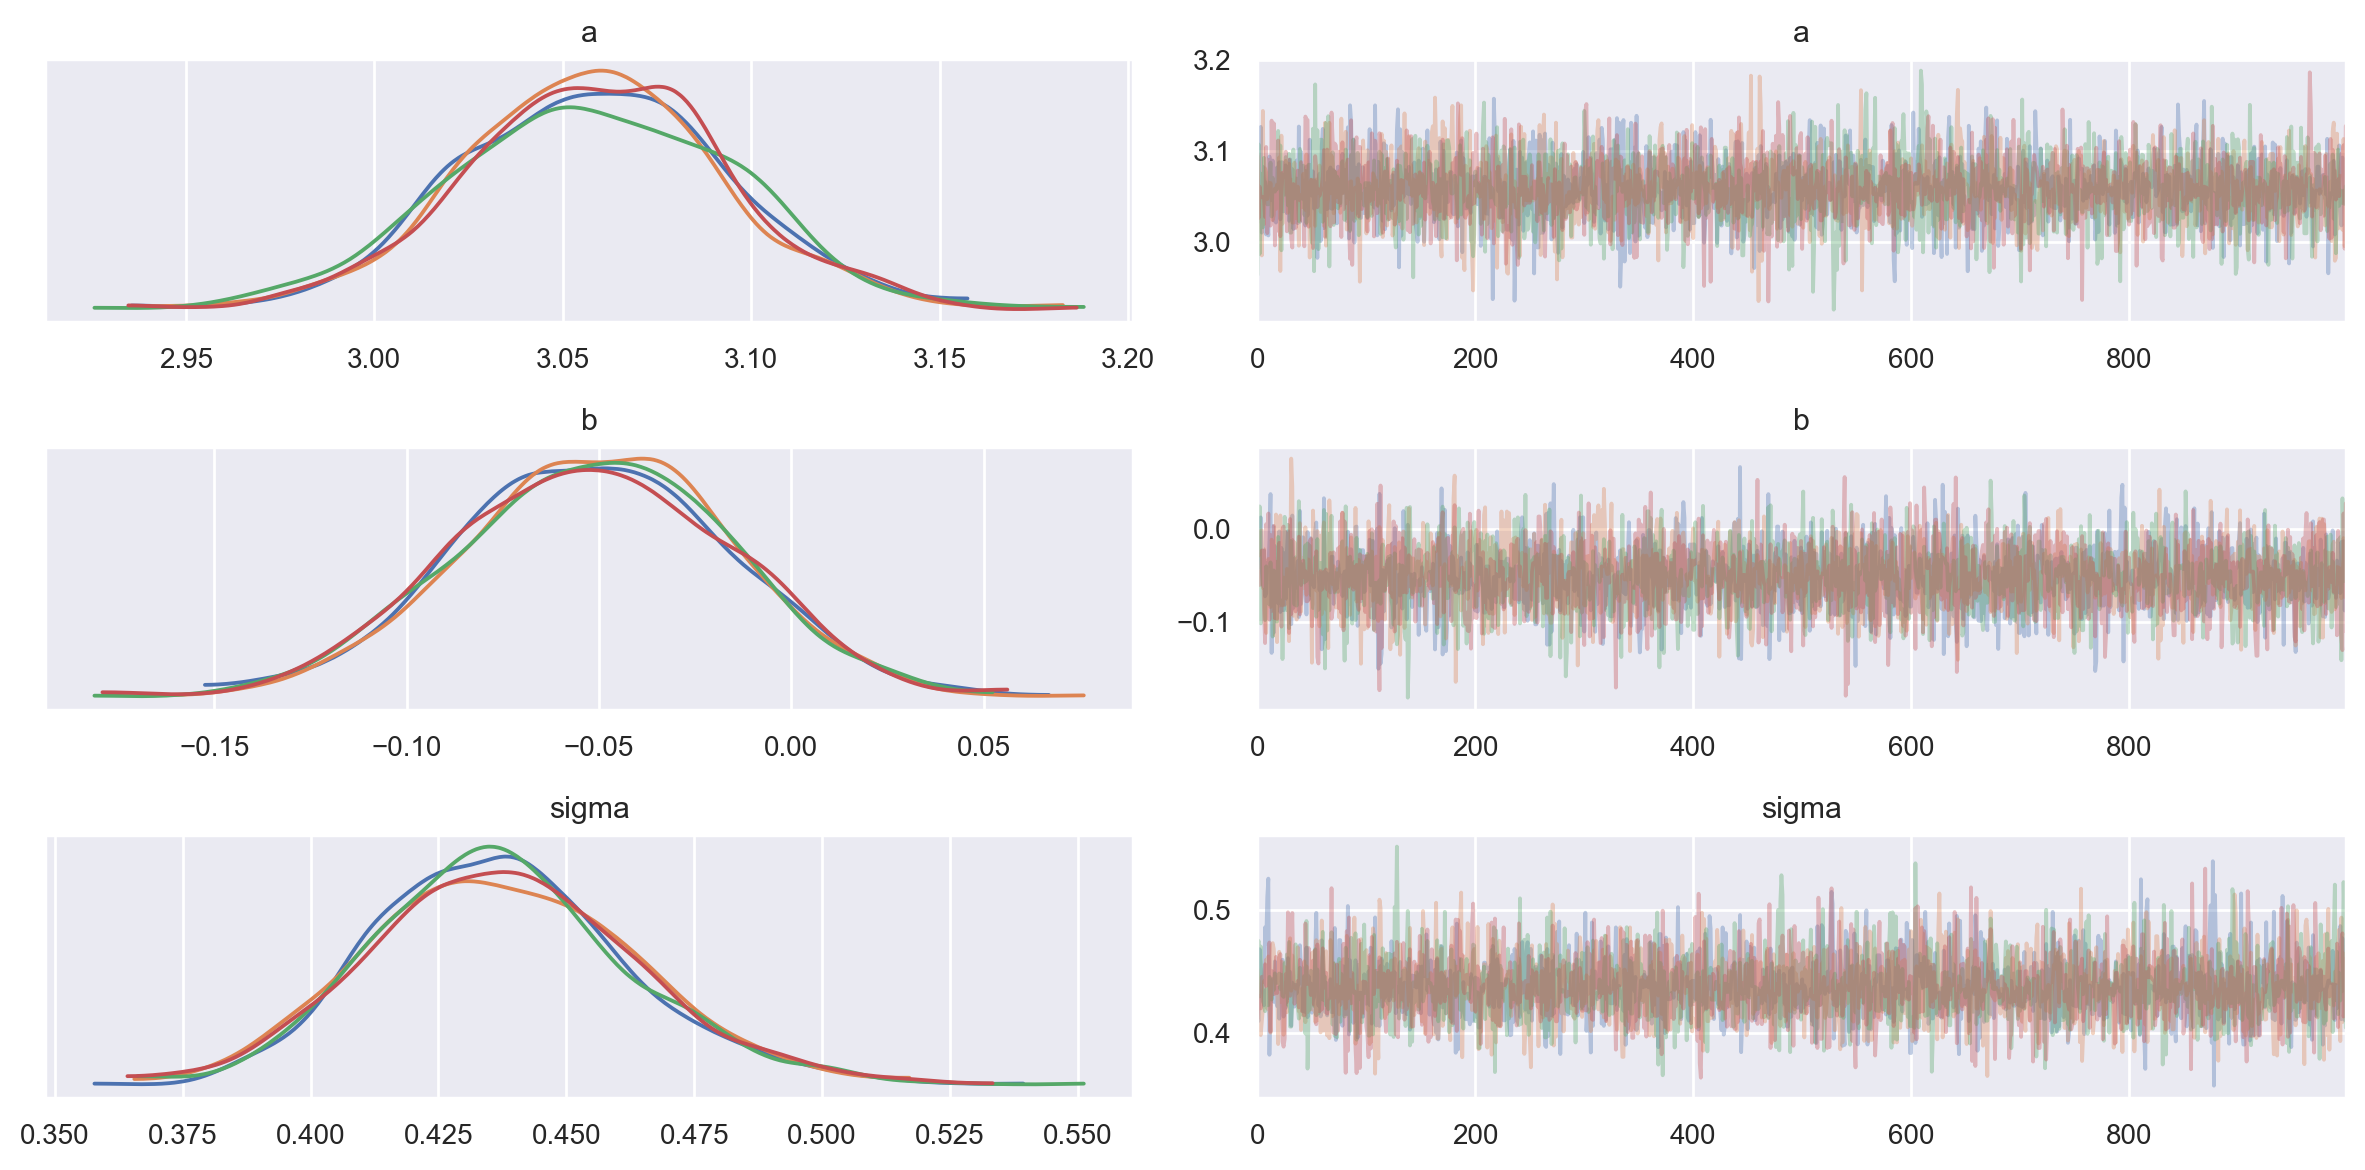

In [6]:
az.plot_trace(nuts_trace, var_names=["a", "b", "sigma"], compact=False)
plt.tight_layout()
plt.show()

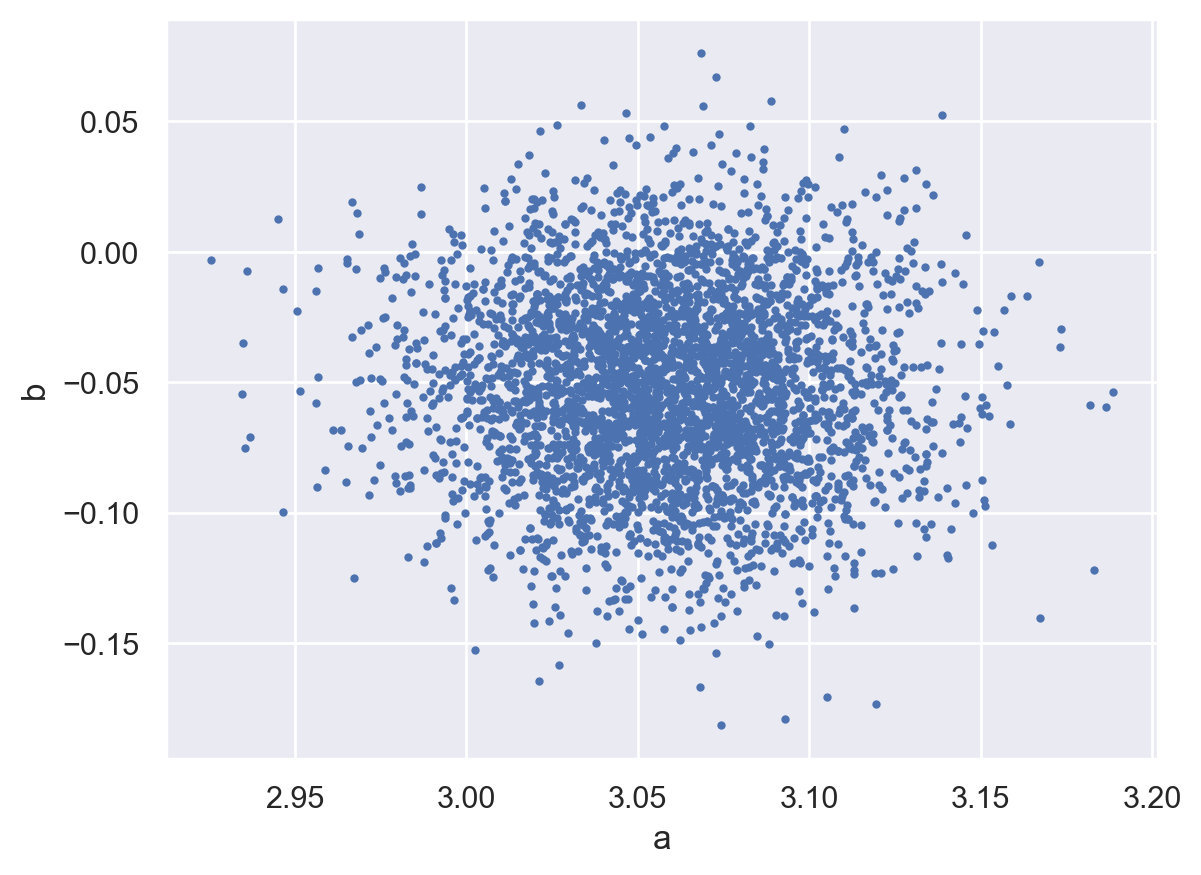

In [7]:
az.plot_pair(nuts_trace, var_names=["a", "b"])
plt.show()

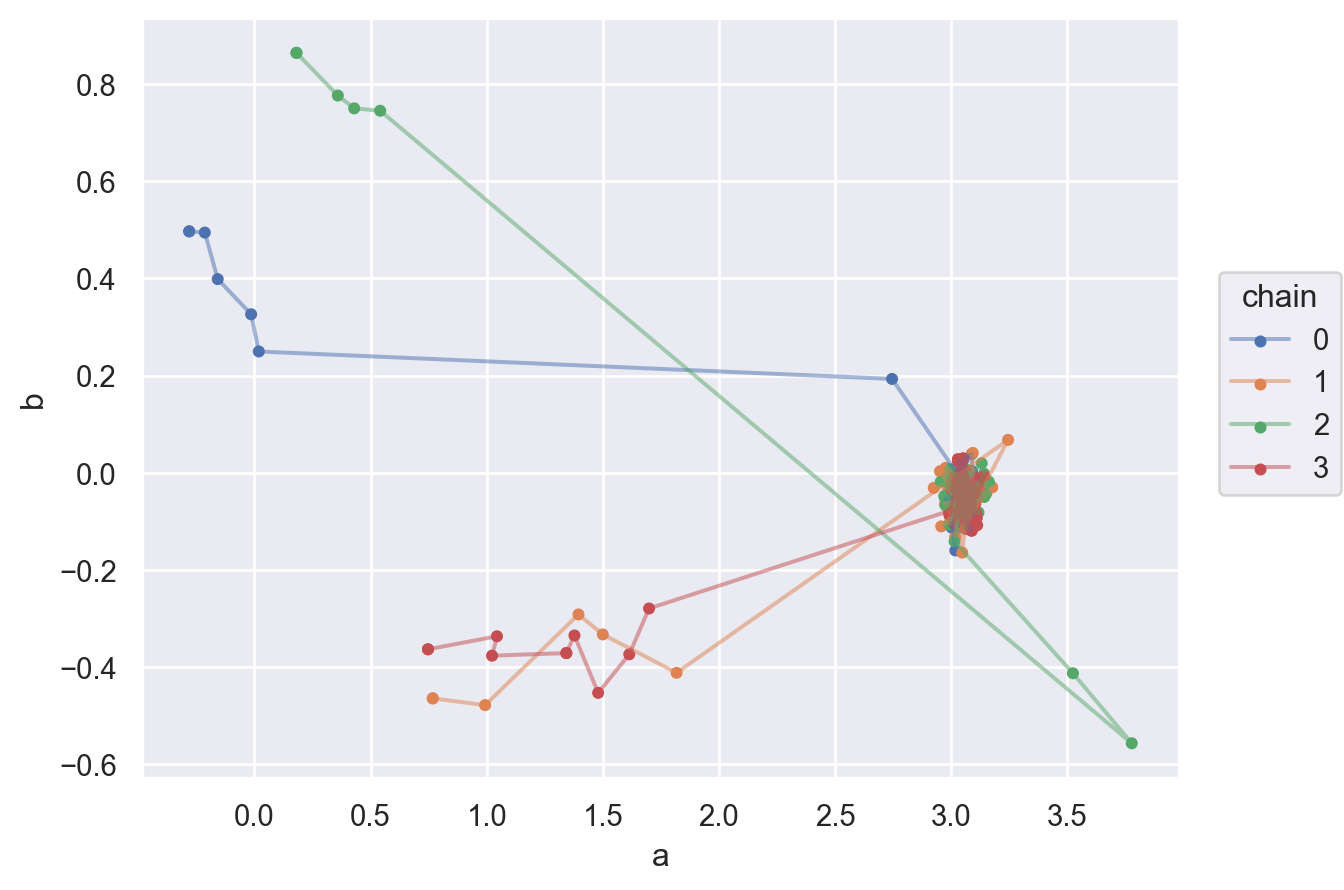

In [8]:
warmup = (
    nuts_trace.warmup_posterior.get(["a", "b"])
    .to_dataframe()
    .reset_index(drop=False)
    .query("draw <= 500")
    .astype({"chain": str})
)

(
    so.Plot(warmup.query("draw < 100"), "a", "b", color="chain")
    .add(so.Path(alpha=0.5))
    .add(so.Dot(pointsize=4))
)

In [9]:
with build_model(iris) as model:
    hmc_trace = pm.sample(
        step=pm.HamiltonianMC(model.free_RVs),
        chains=4,
        random_seed=123,
        discard_tuned_samples=False,
    )

Multiprocess sampling (4 chains in 2 jobs)
HamiltonianMC: [a, b, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


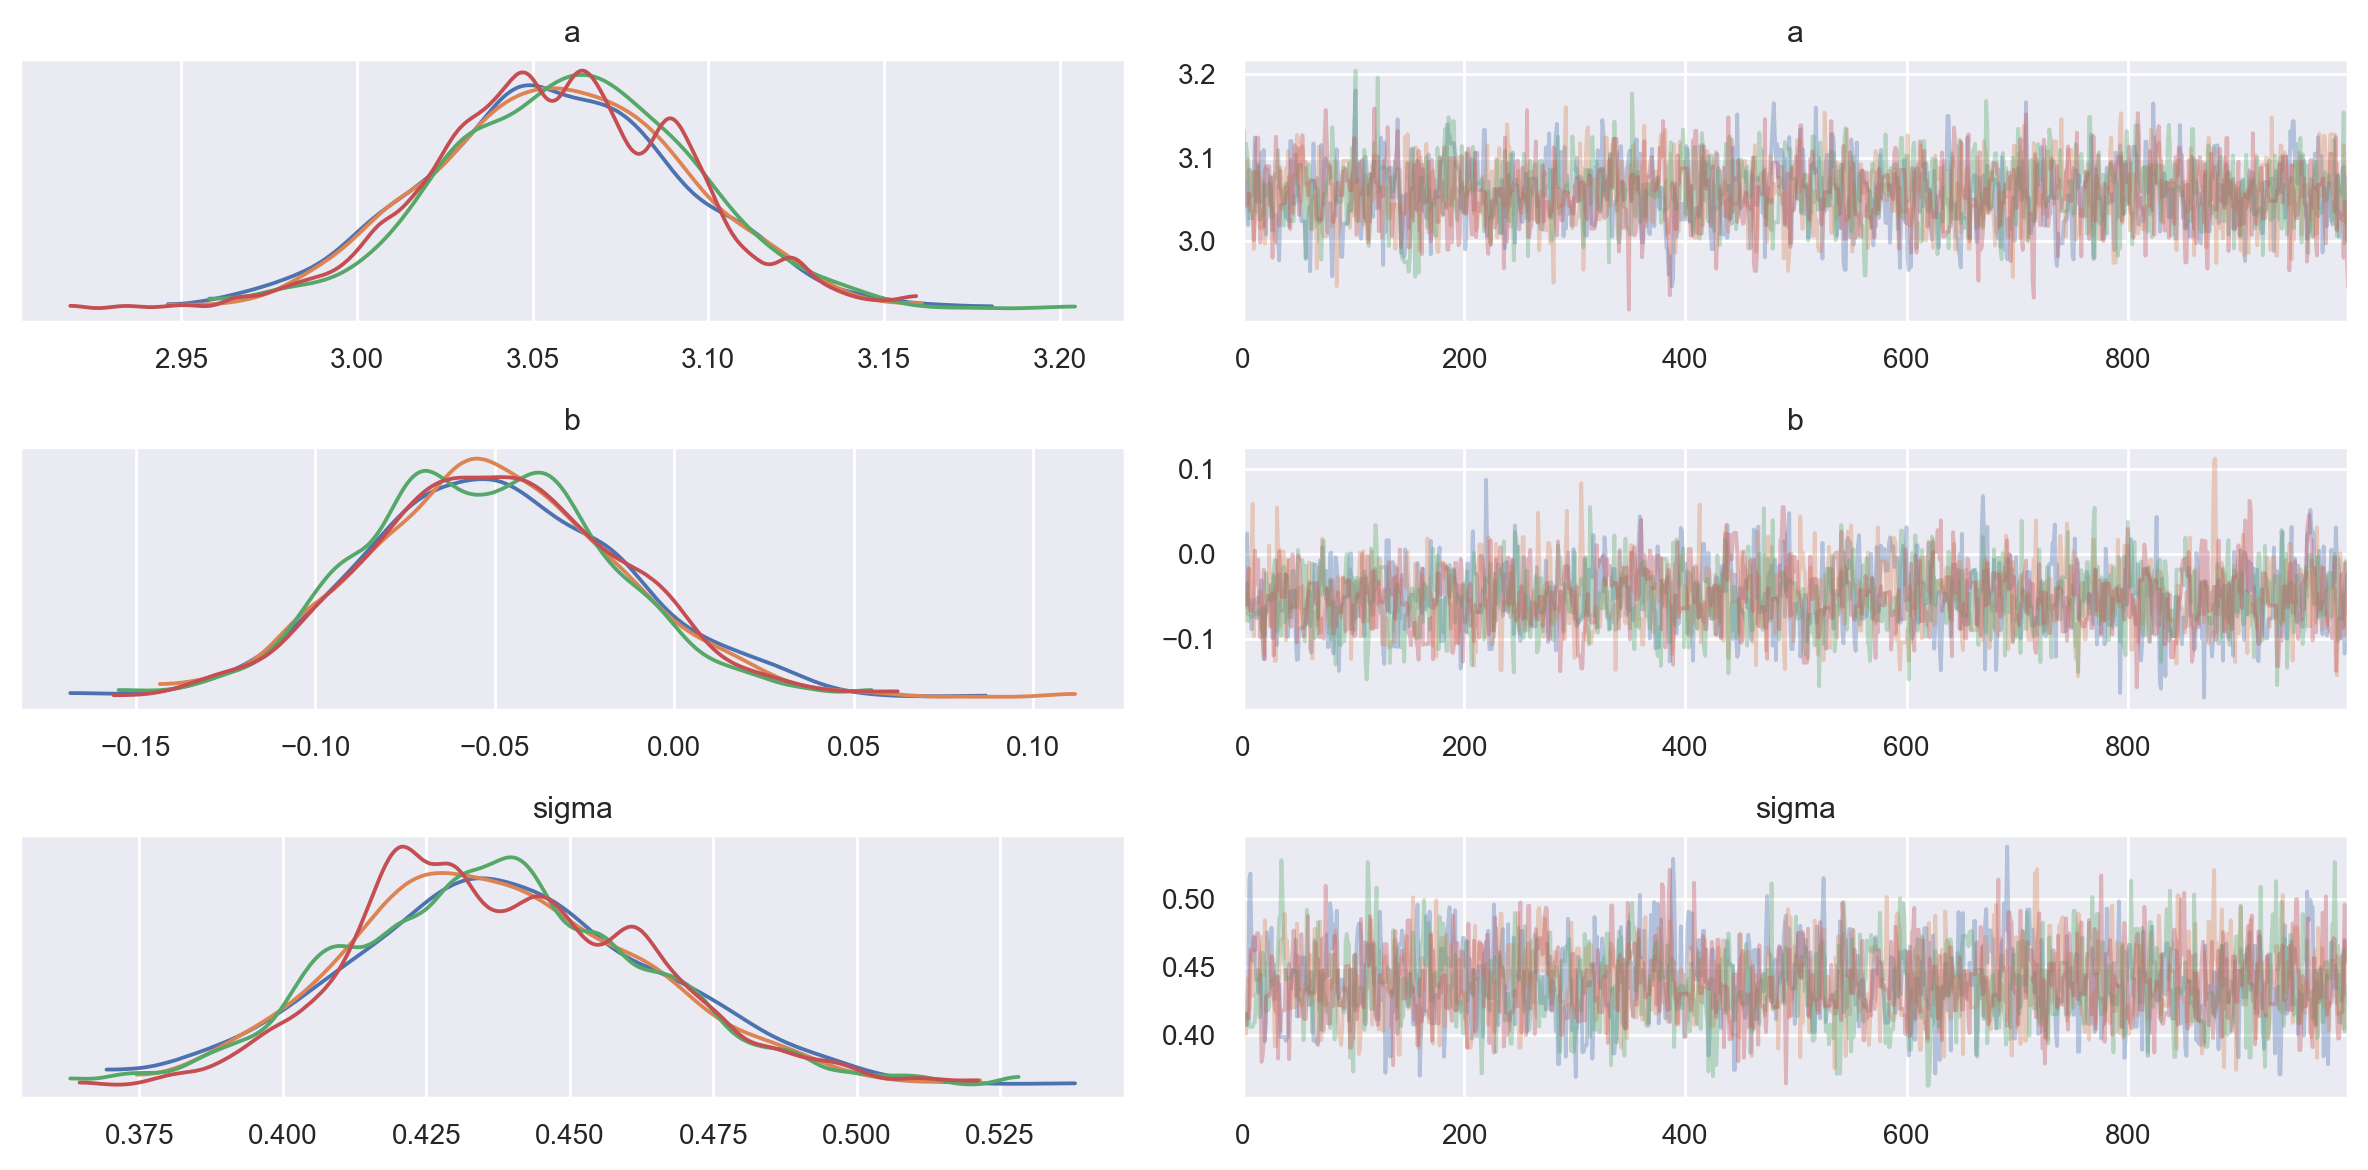

In [10]:
az.plot_trace(hmc_trace, var_names=["a", "b", "sigma"], compact=False)
plt.tight_layout()
plt.show()

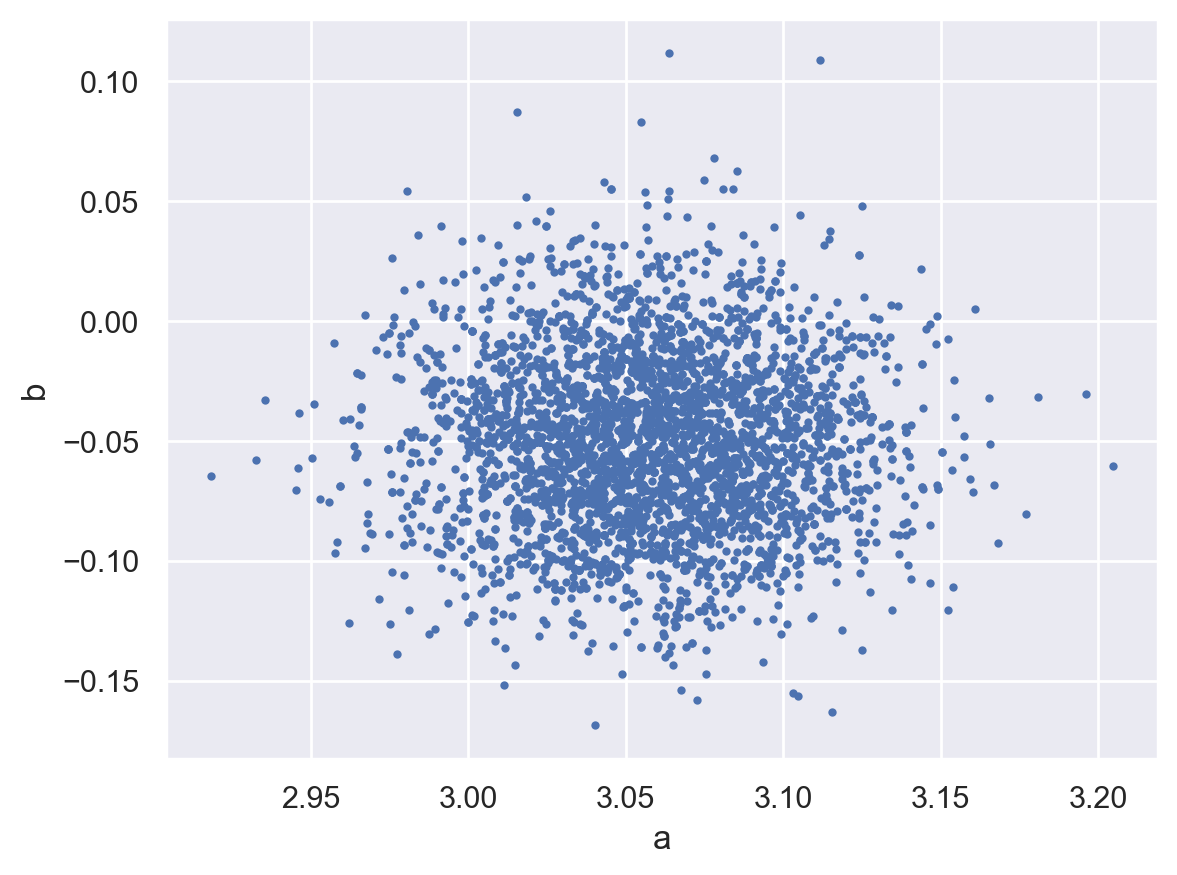

In [11]:
az.plot_pair(hmc_trace, var_names=["a", "b"])
plt.show()

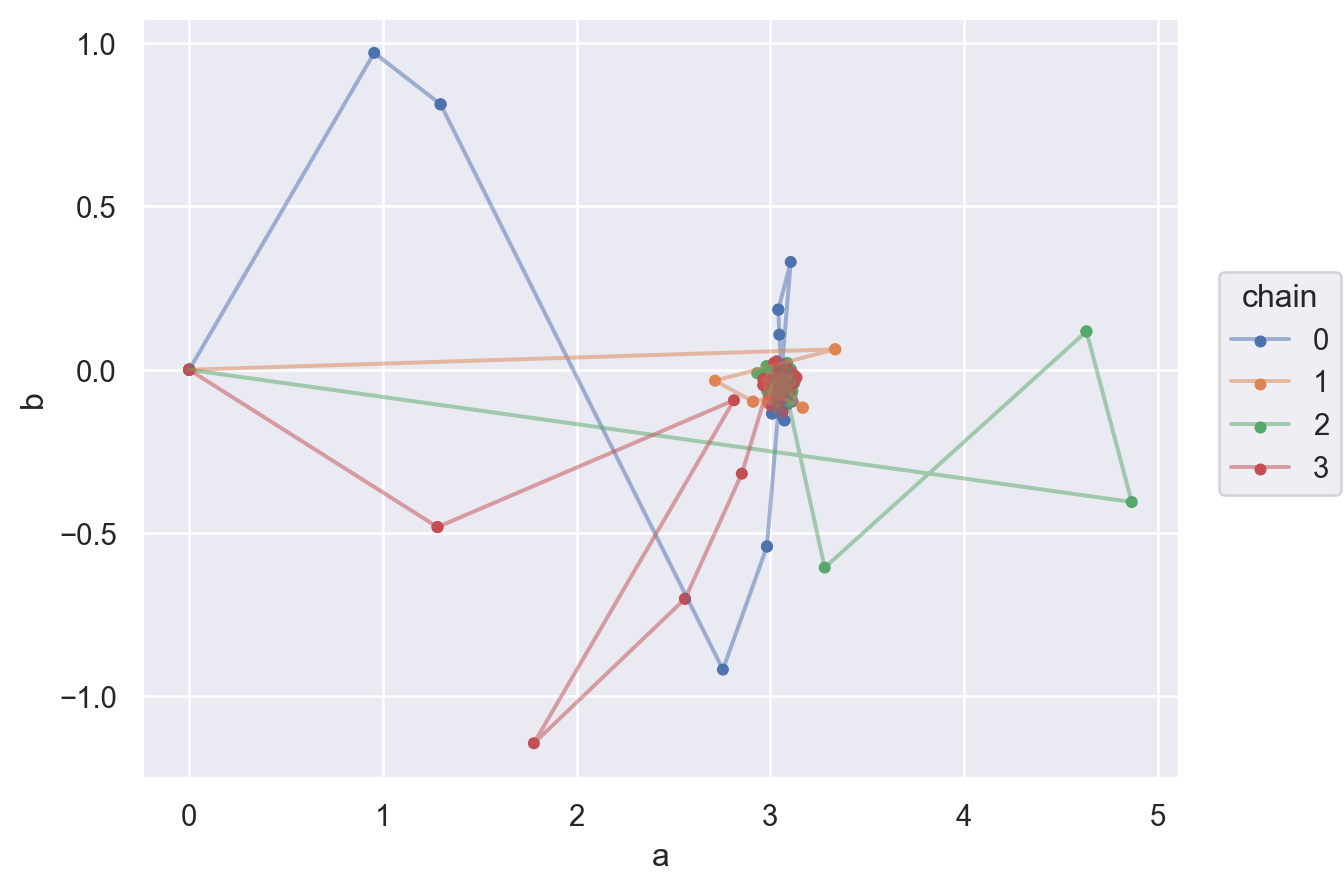

In [12]:
warmup = (
    hmc_trace.warmup_posterior.get(["a", "b"])
    .to_dataframe()
    .reset_index(drop=False)
    .query("draw <= 500")
    .astype({"chain": str})
)

(
    so.Plot(warmup.query("draw < 100"), "a", "b", color="chain")
    .add(so.Path(alpha=0.5))
    .add(so.Dot(pointsize=4))
)

Metropolis Hastings

In [13]:
with build_model(iris) as model:
    mh_trace = pm.sample(
        step=pm.Metropolis(model.free_RVs),
        chains=4,
        random_seed=123,
        discard_tuned_samples=False,
    )

Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [a]
>Metropolis: [b]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


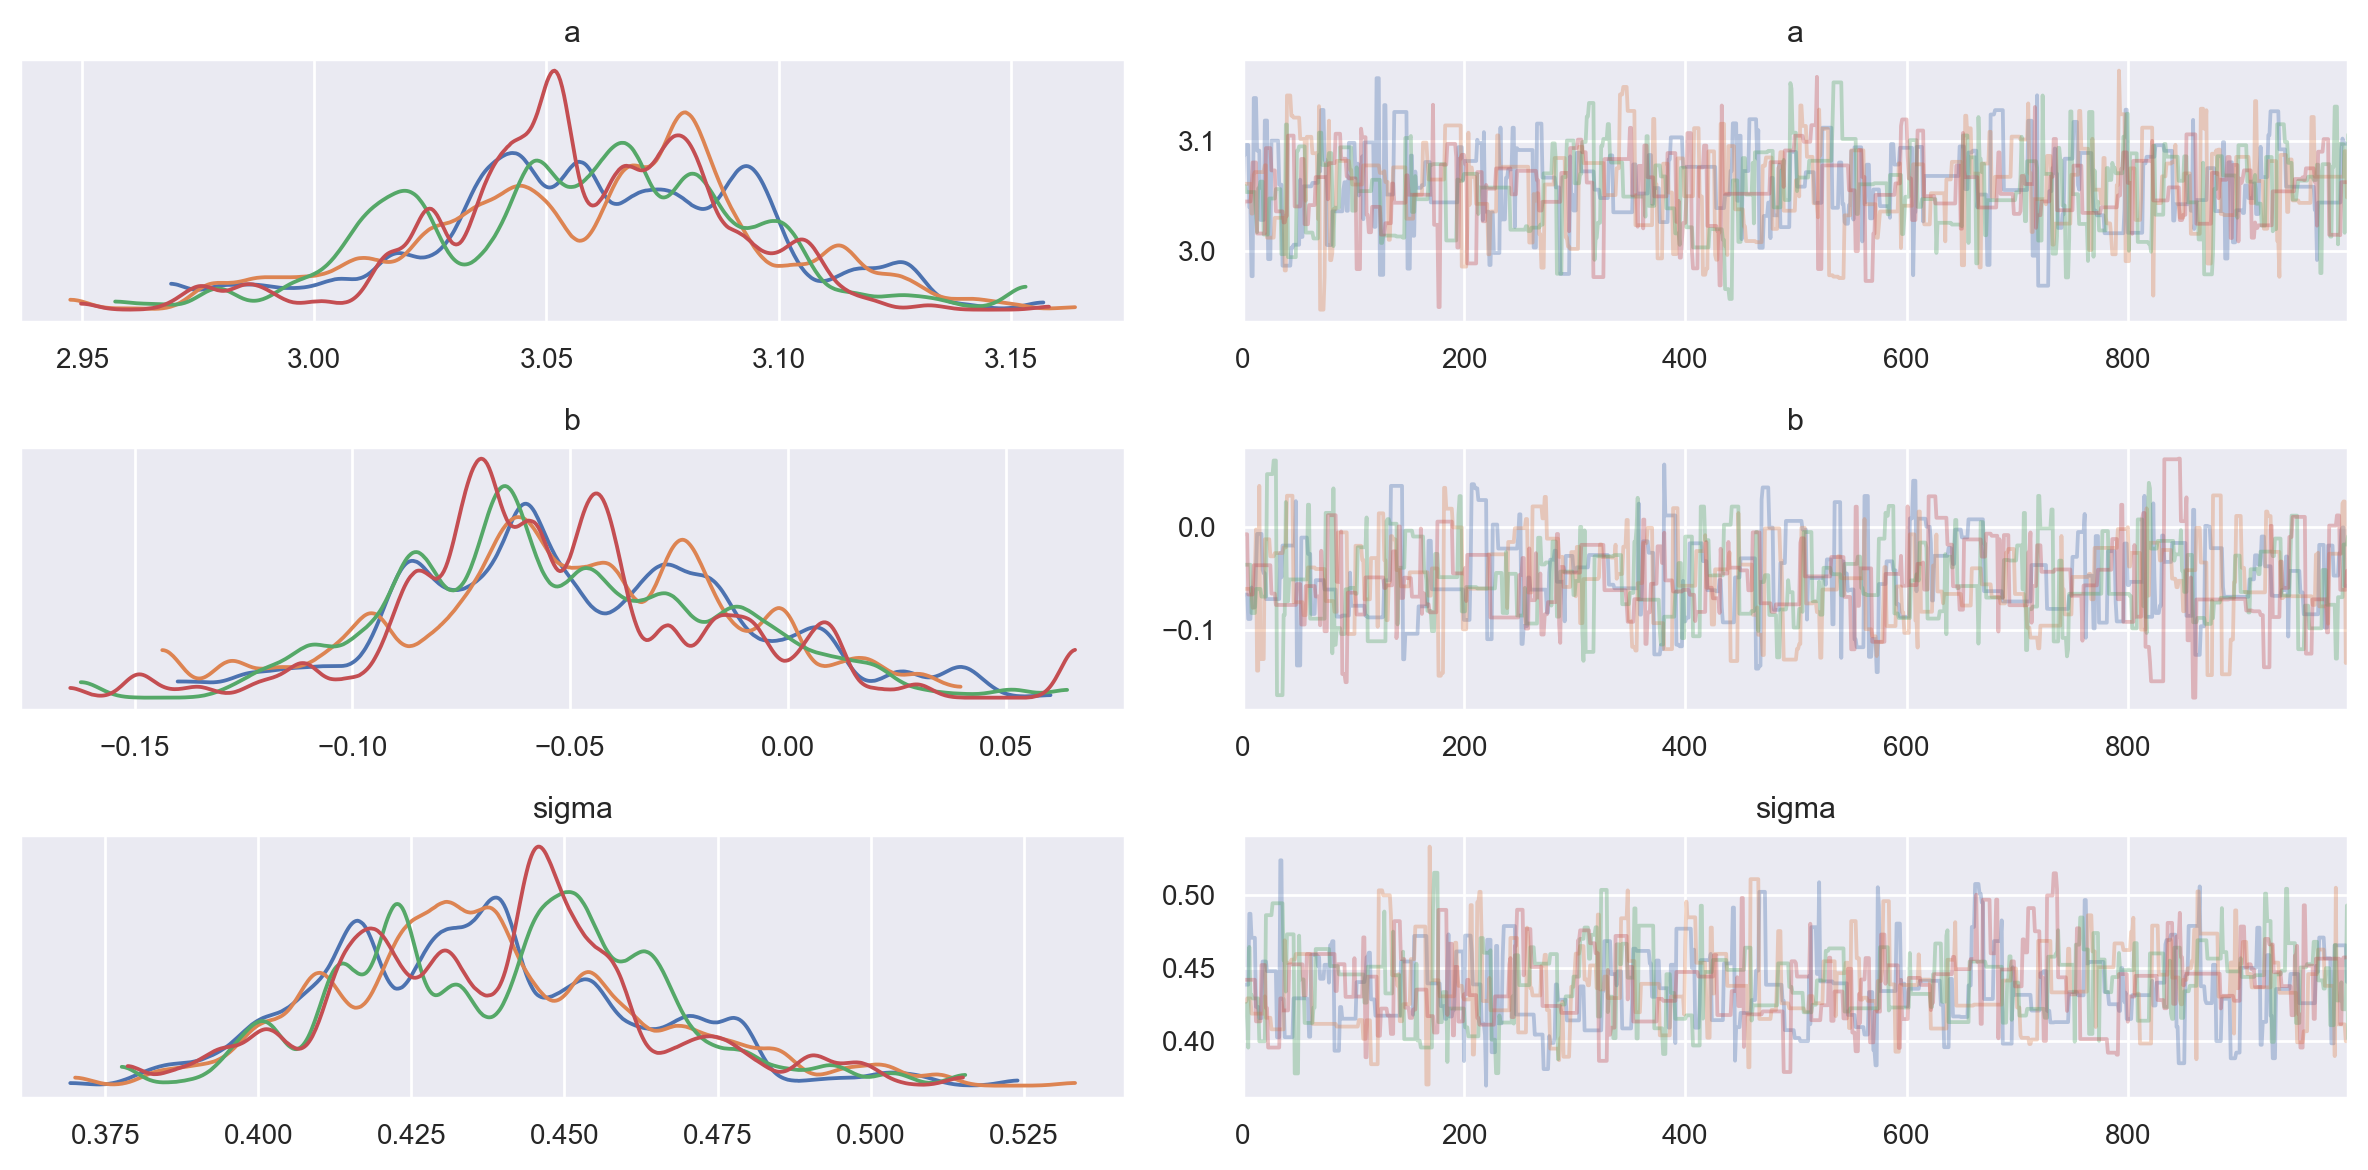

In [14]:
az.plot_trace(mh_trace, var_names=["a", "b", "sigma"], compact=False)
plt.tight_layout()
plt.show()

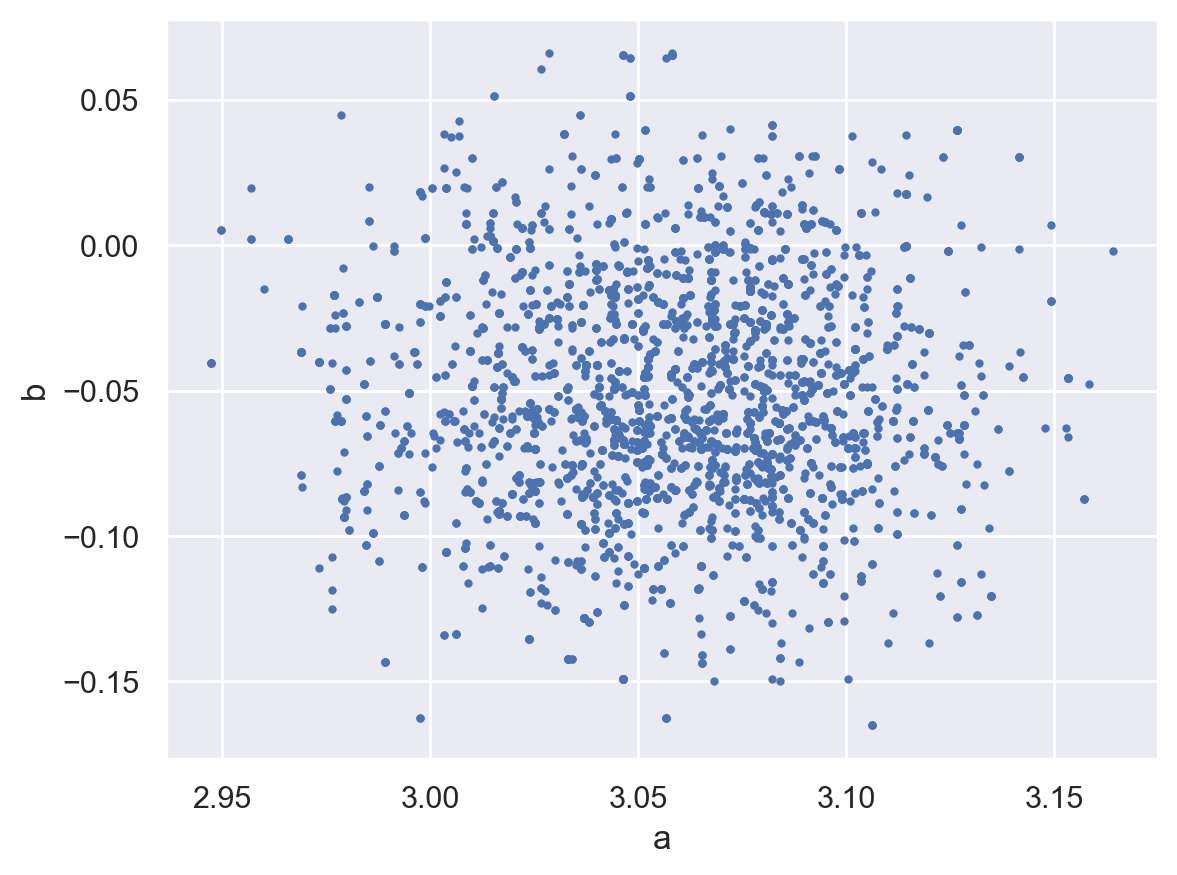

In [15]:
az.plot_pair(mh_trace, var_names=["a", "b"])
plt.show()

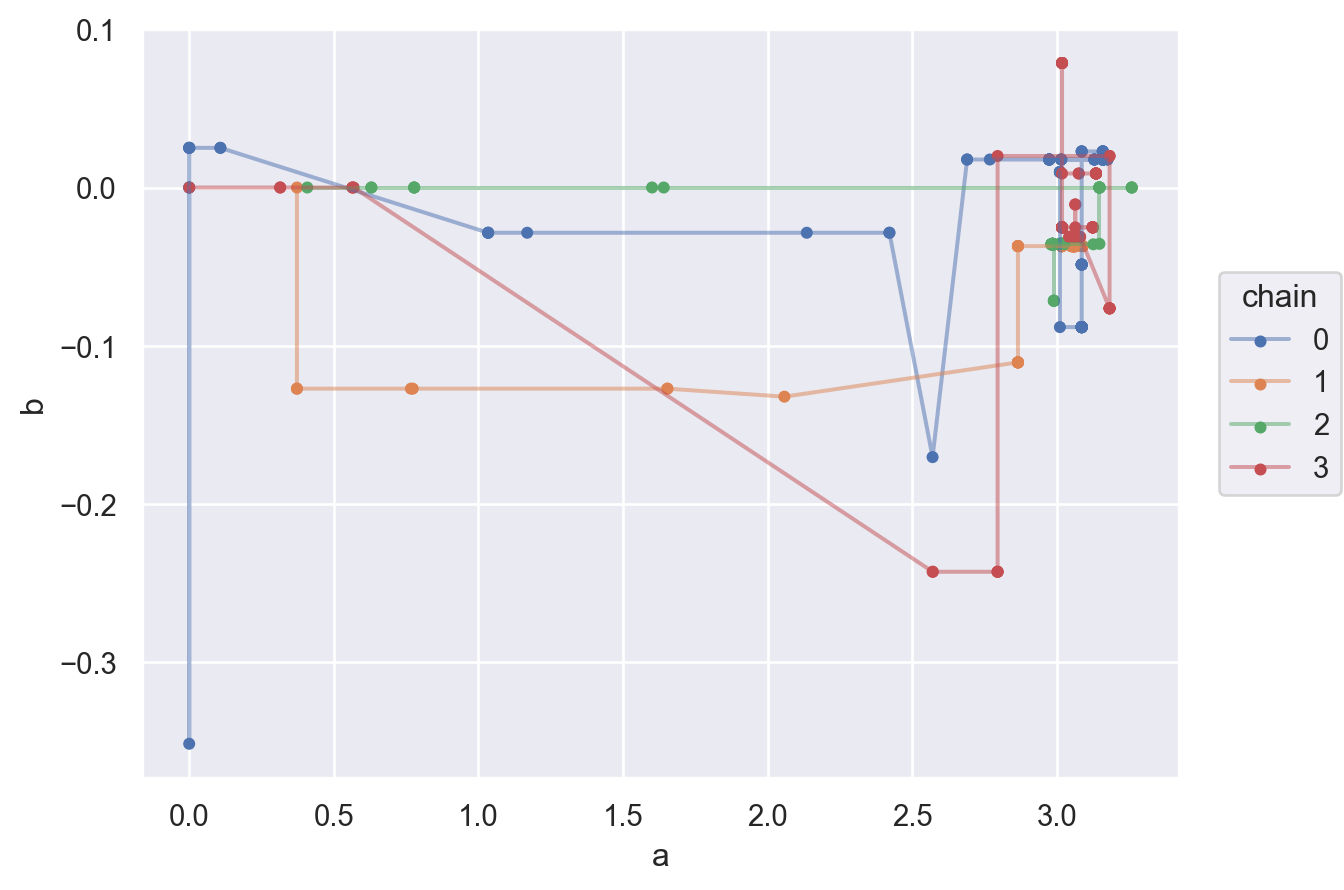

In [16]:
warmup = (
    mh_trace.warmup_posterior.get(["a", "b"])
    .to_dataframe()
    .reset_index(drop=False)
    .query("draw <= 500")
    .astype({"chain": str})
)

(
    so.Plot(warmup.query("draw < 100"), "a", "b", color="chain")
    .add(so.Path(alpha=0.5))
    .add(so.Dot(pointsize=4))
)

---

## Session info

In [17]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2023-01-16

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.8.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: master

pandas    : 1.5.2
matplotlib: 3.6.2
arviz     : 0.14.0
pymc      : 5.0.1
seaborn   : 0.12.2
numpy     : 1.24.1

